# パッケージのインストール

In [1]:
!pip install pyocr
!apt install tesseract-ocr libtesseract-dev tesseract-ocr-jpn

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libtesseract-dev is already the newest version (4.1.1-2build2).
tesseract-ocr is already the newest version (4.1.1-2build2).
tesseract-ocr-jpn is already the newest version (1:4.00~git30-7274cfa-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [2]:
!tesseract --list-langs

List of available languages (3):
eng
jpn
osd


# 初期設定

In [3]:
from PIL import Image
import pyocr
import cv2
from google.colab.patches import cv2_imshow

# pyocrが使えることを確認する
tools = pyocr.get_available_tools()
# tesseractのみダウンロードしたため0番目を指定
tool = tools[0]
print(tool.get_name())

# Tesseract (sh)と出力されればOK

Tesseract (sh)


In [8]:
# /content/drive/MyDrive/Private/AI/文字抽出（OCR)/OCR横1.png
img1_path = input('ファイルまでのパスを入力')

ファイルまでのパスを入力/content/drive/MyDrive/Private/AI/文字抽出（OCR)/OCR横1.png


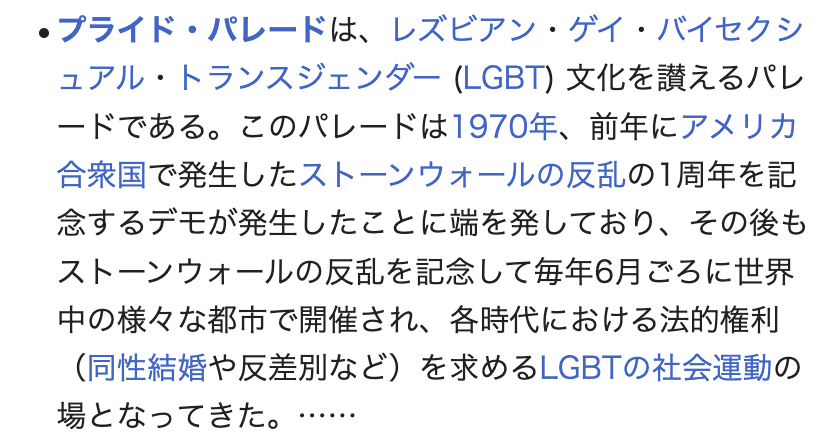

In [9]:
img1 = Image.open(img1_path)
img1

## 文字の読み取り

In [10]:
# image_to_string("対象","言語",オプション)
txt1 = tool.image_to_string(
    img1,
    lang='jpn+eng',
    builder=pyocr.builders.TextBuilder(tesseract_layout=6)
)

print(txt1)

sプライド・パレードは、レズビアン・ゲイ・バイセクシ
ュアル・トランスジェンダー (LGBT) 文化を讃えるパレ
ードである。このパレードは1970年、前年にアメリカ
合衆国で発生したストーンウォールの反乱の1周年を記
念するデモが発生したことに端を発しており、その後も
ストーンウォールの反乱を記念して毎年6月さろに世界
中の様々な都市で開催され、各時代における法的権利

(同性結婚や反差別など) を求めるLGBTの社会運動の
場となってきた。……


## 文字の位置表示

ロジ 5 0 77 57
ガ 53 0 110 57
雇 106 13 158 42
国 124 0 191 57
来期 162 0 253 57
大 258 14 284 41
| 271 0 310 57
日 319 2 356 52
timate, 469 0 949 104
€ 1192 13 1220 42
BRO 15 48 135 105
k 134 48 154 105
IE 163 52 258 100
VEEBNO 258 48 434 105
REDS 433 48 558 105
RED 581 53 672 99
AEC 694 48 800 105
LEE, 80 126 204 154
LEAKE 232 112 371 169
AOLABRP 376 116 975 164
HER 589 112 680 169
ROS 679 112 770 169
MED 779 112 884 169
SAS 883 112 979 169
SHERABA 984 116 1212 163
Soll 197 220 332 249
- 311 206 341 265
§ 345 206 375 265
70 381 223 498 249
SERA 525 210 1214 260
ORROD 817 206 970 265
HOES 969 210 1214 260
eR 16 270 134 299
AS 132 256 192 316
RASS 198 256 447 316
il"), 482 256 588 316


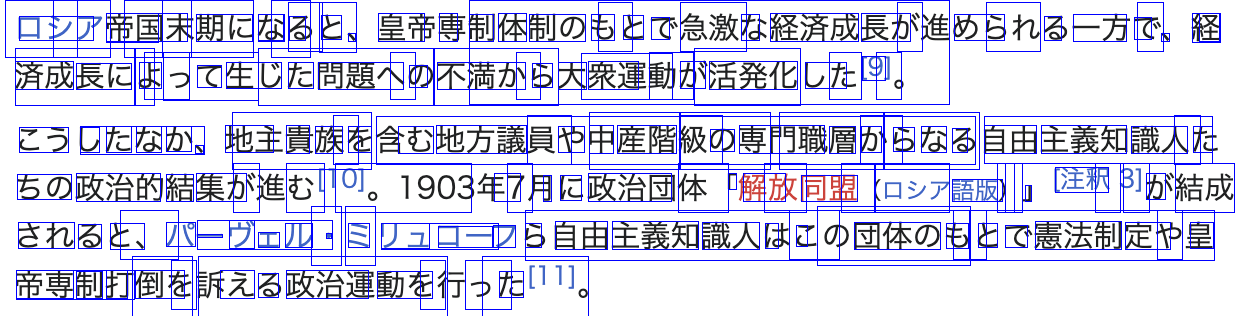

In [7]:
results = tool.image_to_string(
    img1,
    lang='jpn+eng',
    builder=pyocr.builders.WordBoxBuilder(tesseract_layout=6)
)

draw_rectangle = cv2.imread(img1_path)

for box in results:
    print(box)
    #  左上、右下の点
    cv2.rectangle(draw_rectangle, box.position[0], box.position[1], (255, 0, 0), 1)

# 画像の保存
cv2.imwrite('draw_rectangle.png', draw_rectangle)
# 保存済みの画像を表示
draw_rectangle = Image.open('draw_rectangle.png')
draw_rectangle